In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#import data
price_data = pd.read_csv('Input Data/Day Data/day_data_csv.csv')
price_data.dtypes

ema(4)                     float64
high low span              float64
high above ema             float64
close above ema            float64
close relative to high     float64
volume change              float64
volume relative to span    float64
to buy                       int64
dtype: object

In [5]:
#split into x and y 
X = price_data.drop("to buy", axis=1)
y = price_data["to buy"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)


In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


k: 1, Train/Test Score: 1.000/0.493
k: 3, Train/Test Score: 0.734/0.511
k: 5, Train/Test Score: 0.683/0.522
k: 7, Train/Test Score: 0.655/0.539
k: 9, Train/Test Score: 0.635/0.543
k: 11, Train/Test Score: 0.632/0.555
k: 13, Train/Test Score: 0.622/0.558
k: 15, Train/Test Score: 0.621/0.563
k: 17, Train/Test Score: 0.618/0.563
k: 19, Train/Test Score: 0.616/0.568
k: 21, Train/Test Score: 0.615/0.571
k: 23, Train/Test Score: 0.611/0.573
k: 25, Train/Test Score: 0.610/0.574
k: 27, Train/Test Score: 0.610/0.576
k: 29, Train/Test Score: 0.610/0.578
k: 31, Train/Test Score: 0.610/0.579
k: 33, Train/Test Score: 0.609/0.578
k: 35, Train/Test Score: 0.607/0.579
k: 37, Train/Test Score: 0.606/0.583
k: 39, Train/Test Score: 0.607/0.581


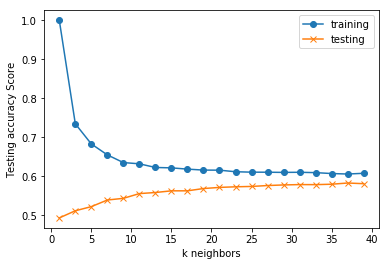

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o', label='training')
plt.plot(range(1, 40, 2), test_scores, marker="x", label='testing')
plt.legend()
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train_scaled, y_train)

training_accur = knn.score(X_train_scaled, y_train)
testing_accur = knn.score(X_test_scaled, y_test) 

print(f"Training Accuracy Score: {training_accur}")
print(f"Testing Accuracy Score: {testing_accur}")

Training Accuracy Score: 0.6091812370022337
Testing Accuracy Score: 0.5784041897720271


In [14]:
# Use our model to make predictions and generate confusion matrix
y_test_predict = knn.predict(X_test_scaled)
y_train_predict = knn.predict(X_train_scaled)

#price_data["Prediction"]=predict_all
#price_data.to_csv('predicted_price_data.csv')

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))
print(confusion_matrix(y_train, y_train_predict))

[[ 296 1956    0    0]
 [ 447 3458    6    0]
 [  20  262    1    0]
 [   1   45    0    0]]
[[ 757 3796    3    0]
 [ 606 7145    3    0]
 [  37  546    7    0]
 [   2   80    1    0]]


In [16]:
#Summary of model performance
from sklearn.metrics import mean_squared_error, accuracy_score

training_score = accuracy_score(y_train, y_train_predict)
testing_score = accuracy_score(y_test, y_test_predict) 

print(f"Training Accuracy: {training_score}")
print(f"Testing Accuracy: {testing_score}")

training_mse = mean_squared_error(y_train, y_train_predict)
testing_mse = mean_squared_error(y_test, y_test_predict)

print(f"Training Mean Squared Error (MSE): {training_mse}")
print(f"Testing Mean Squared Error (MSE): {testing_mse}")

Training Accuracy: 0.6091812370022337
Testing Accuracy: 0.5784041897720271
Training Mean Squared Error (MSE): 0.4197797119309867
Testing Mean Squared Error (MSE): 0.45286506469500926
